In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table
import mapview
import fkplotlib
import astropy.units as u
from scipy.ndimage import gaussian_filter1d
fkplotlib.use_txfonts()

# Plots for correlated noise

In [ ]:
map_noise = fits.getdata("Data/PSZ2G183/iter5/map_JK.fits", 4)
maps_noise = [fits.getdata("Data/PSZ2G183/noise_realizations.fits", i) for i in np.random.randint(0, 100, 10)]

In [ ]:
fig, ax = mapview.fitsview("Data/PSZ2G183/iter5/map_JK.fits", 4, crop=5*u.arcmin, smooth=1.4, imrange=[-1, 1], scale=1000)
ax.tick_params(axis="both", labelcolor="w")
ax.set_xlabel(" ")
ax.set_ylabel(" ")
fig.savefig("maps_noise_realjk.pdf", transparent=True)

In [ ]:
for i, j in enumerate(np.random.randint(0, 100, 5)):
    fig, ax = mapview.fitsview("Data/PSZ2G183/noise_realizations.fits", j, crop=5*u.arcmin, smooth=1.4, imrange=[-1, 1], scale=2000, offset=-0.8)
    ax.tick_params(axis="both", labelcolor="w")
    ax.set_xlabel(" ")
    ax.set_ylabel(" ")
    fig.savefig(f"maps_noise_real{i}.pdf", transparent=True)
    plt.close(fig)

In [ ]:
covmat = 1e6 * np.load("covmat.npy")

In [ ]:
fig, ax = plt.subplots()
im = ax.matshow(covmat, interpolation=None, cmap="RdBu_r", vmin=-0.01, vmax=0.01)
cb = fig.colorbar(im)
cb.set_label(r"Noise covariance $[{\rm mJy^2/beam^2}]$")
ax.set_xlabel("Pixel number")
ax.set_ylabel("Pixel number")
ax.xaxis.set_label_position('top')
fig.savefig("covmat.pdf")

In [ ]:
fig, ax = plt.subplots()
ax.plot(k_real, pk_real, "ko-")

def get_pk(m):
    k_map = np.fft.fftshift(np.fft.fftfreq(*m.shape))
    pk_map = np.fft.fftshift(np.abs(np.fft.fft2(m)))
    k_bins = np.linspace(np.abs(k_map).min(), np.abs(k_map).max(), 20)
    k_vec, pk_vec = [], []
    for i in range(len(k_bins) - 1):
        w = np.logical_and(np.abs(k_map) <= k_bins[i+1], np.abs(k_map) >= k_bins[i])
        #print(k_bins[i], k_bins[i+1], np.sum(w))
        k_vec.append(np.average(np.abs(k_map)[w]))
        pk_vec.append(np.average(pk_map[w]))
    return np.array(k_vec), np.array(pk_vec)

map_real = fits.getdata("Data/PSZ2G183/iter5/map_JK.fits", 4)
k_real, pk_real = get_pk(map_real)

for i, j in enumerate(np.random.randint(0, 100, 5)):
    m = fits.getdata("Data/PSZ2G183/noise_realizations.fits", j)
    ax.plot(*get_pk(m))





# Plots for transfer function

In [ ]:
plt.close('all')
map_in = fits.getdata("Data/PSZ2G183/simu/input.fits", 4)
map_out_double = fits.getdata("Data/PSZ2G183/simu/iter4/map.fits", 4)
map_out_noise = fits.getdata("Data/PSZ2G183/iter4/map.fits", 4)
map_out = map_out_double - map_out_noise

n = 101
h = map_out.shape[0] // 2
w = slice(h - n//2, h + n//2)

for i, m in enumerate([map_in, map_out, map_out_double, map_out_noise]):
    fig, ax = mapview.mapview(m[w, w] * 1000, imrange=[-1.5, 1.5], smooth=1.4)
    fkplotlib.ax_bothticks(ax)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    fig.savefig(f"map_tf_{i}.pdf", transparent=True)

### Mock TOI plots

<IPython.core.display.Javascript object>


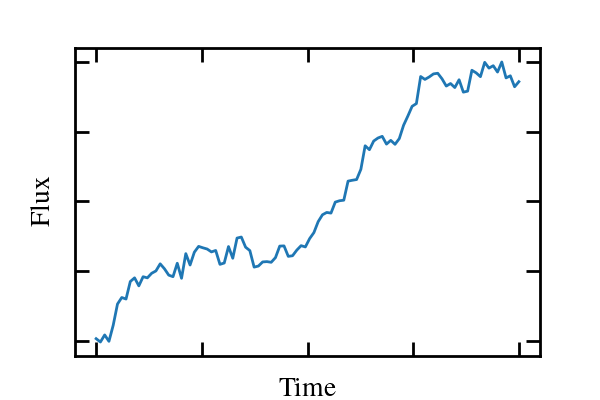

In [16]:
t = np.linspace(0, 10, 100)
toi = gaussian_filter1d(t + np.sin(t) + np.random.normal(0, 1.0, t.shape), 2.0) + np.random.normal(0, 0.2, t.shape)

plt.close('all')
fig, ax = plt.subplots(figsize=(3, 2))
ax.plot(t, toi)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xlabel("Time")
ax.set_ylabel("Flux")
fkplotlib.ax_bothticks(ax)
fig.savefig("fake_toi.pdf", transparent=True)